<a href="https://colab.research.google.com/github/navgaur/QM1_UGCF/blob/main/Schrodinger_Eqn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Mechanics 1 for UGCF Quantum Mechanics 1 Lab (DSC paper)**


# Unit - 2
---

##**Solve the Schrodinger equation using shooting/finite difference or any other method for 1-d potentials**

 - Particle in a box
 - Particle in a finite potential well
 - Harmonic potential
---

###**Particle in a box**

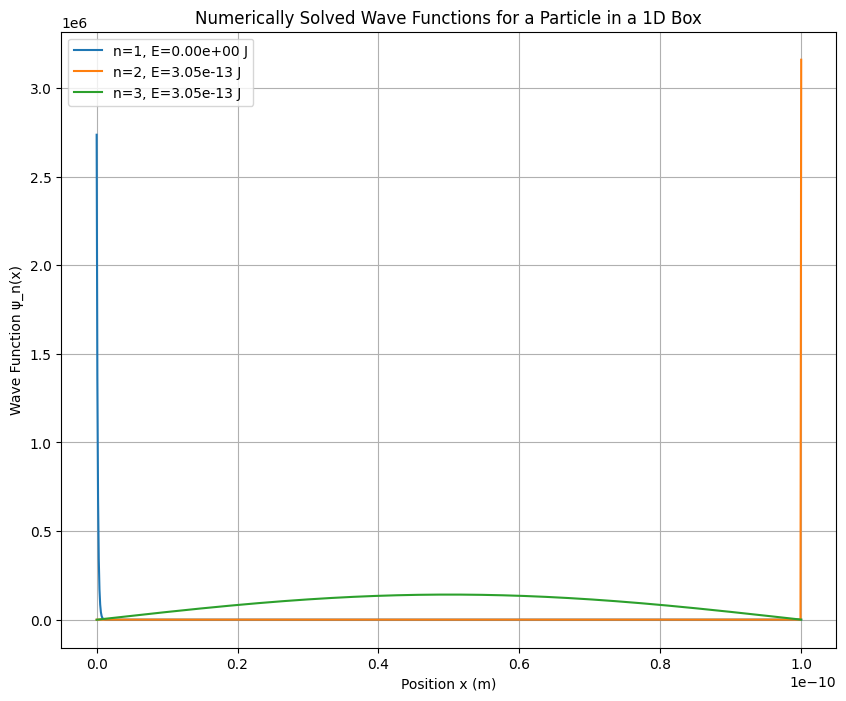

Energy level n=1: E = 0.00e+00 J
Energy level n=2: E = 3.05e-13 J
Energy level n=3: E = 3.05e-13 J


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1000              # Number of discrete points

# Discretize the space
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Create the Hamiltonian matrix using finite difference method
H = np.zeros((N, N))

# Fill the Hamiltonian matrix (kinetic energy part)
for i in range(1, N-1):
    H[i, i] = -2.0
    H[i, i-1] = H[i, i+1] = 1.0

# Apply the scaling factor for the kinetic energy operator
H = -H * (hbar**2 / (2 * m * dx**2))

# Solve the eigenvalue problem Hψ = Eψ
energies, wavefunctions = eigh(H)

# Shift energies to ensure non-negative values
energies = energies - np.min(energies)

# Normalize the wave functions
wavefunctions = wavefunctions.T / np.sqrt(dx)

# Plot the first 3 wave functions
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={energies[i]:.2e} J")

plt.title("Numerically Solved Wave Functions for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the first 3 energy levels
for i in range(3):
    print(f"Energy level n={i+1}: E = {energies[i]:.2e} J")


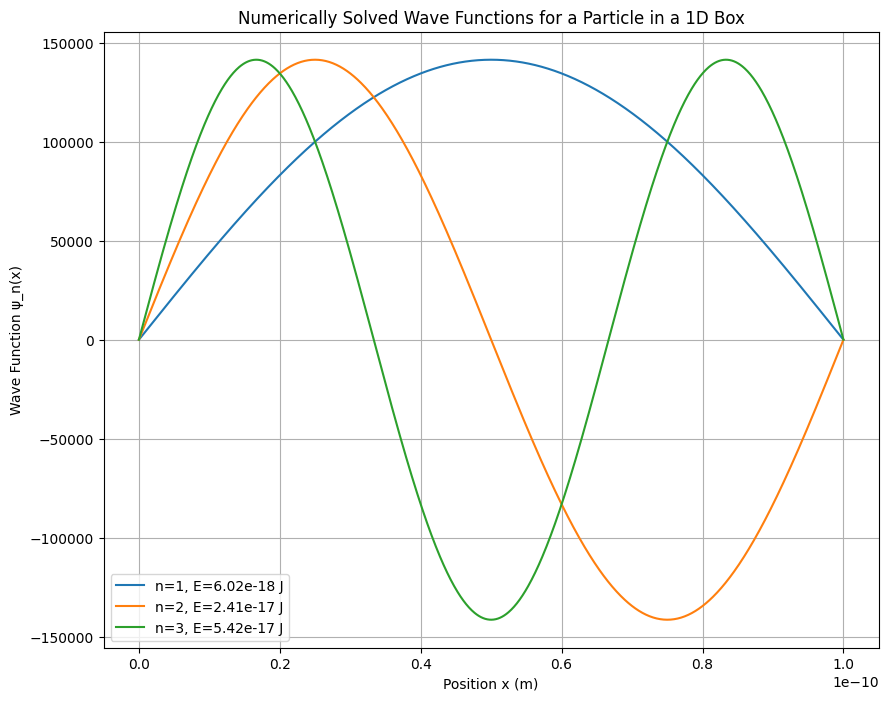

Energy level n=1: E = 6.02e-18 J
Energy level n=2: E = 2.41e-17 J
Energy level n=3: E = 5.42e-17 J


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1000              # Number of discrete points

# Discretize the space
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Create the Hamiltonian matrix using finite difference method
H = np.zeros((N, N))

# Fill the Hamiltonian matrix (kinetic energy part)
for i in range(1, N-1):
    H[i, i] = -2.0
    H[i, i-1] = H[i, i+1] = 1.0

# Apply the scaling factor for the kinetic energy operator
H = -H * (hbar**2 / (2 * m * dx**2))

# Set boundary conditions: Ensuring wave functions are zero at the boundaries
H[0, 0] = H[-1, -1] = 1.0
H[0, 1] = H[-1, -2] = 0.0

# Solve the eigenvalue problem Hψ = Eψ
energies, wavefunctions = eigh(H)

# Normalize the wave functions
wavefunctions = wavefunctions.T / np.sqrt(dx)

# Plot the first 3 wave functions
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={energies[i]:.2e} J")

plt.title("Numerically Solved Wave Functions for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the first 3 energy levels
for i in range(3):
    print(f"Energy level n={i+1}: E = {energies[i]:.2e} J")


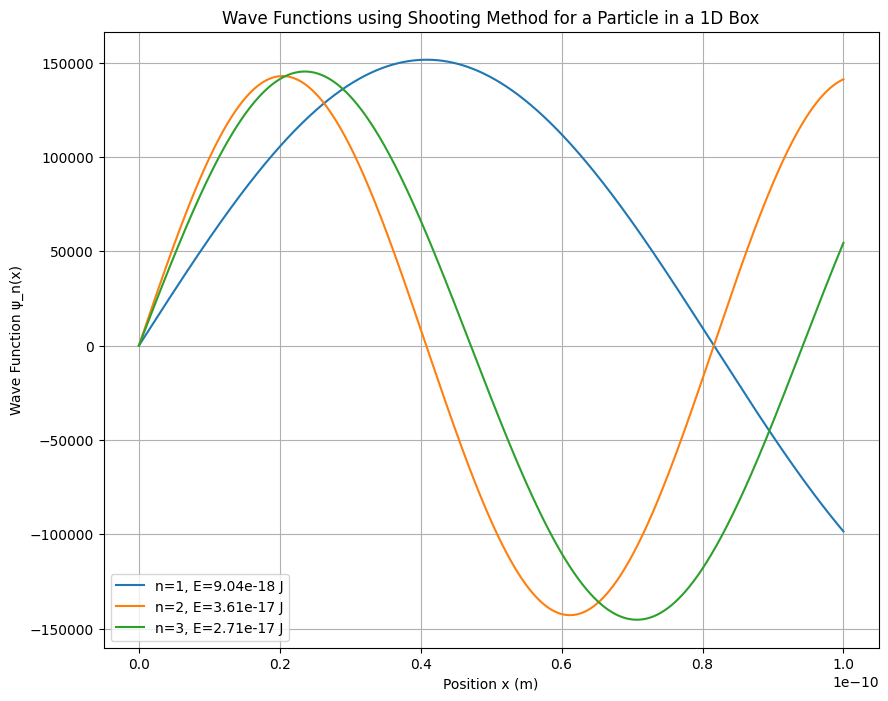

Energy level n=1: E = 9.04e-18 J
Energy level n=2: E = 3.61e-17 J
Energy level n=3: E = 2.71e-17 J


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule*seconds)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-10             # Length of the box (meters)
N = 1000              # Number of discrete points

# Define the potential function V(x) for an infinite box
def V(x):
    return 0 if 0 <= x <= L else np.inf

# Define the Schrödinger equation as a system of first-order ODEs
def schrodinger(x, y, E):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = 2 * m / hbar**2 * (V(x) - E) * psi
    return [dpsi_dx, dphi_dx]

# Shooting method to find the wave function for a given energy
def solve_schrodinger(E, x):
    # Initial conditions: psi(0) = 0, psi'(0) = 1 (arbitrary)
    y0 = [0, 1]
    sol = solve_ivp(schrodinger, [0, L], y0, args=(E,), t_eval=x)
    return sol.y[0]  # return psi(x)

# Find energy by matching boundary condition psi(L) = 0 using a root-finding method
from scipy.optimize import root_scalar

def find_energy_level(n):
    # Define a function whose root we want to find
    def boundary_condition(E):
        psi = solve_schrodinger(E, np.linspace(0, L, N))
        return psi[-1]  # We want psi(L) = 0

    # Estimate the energy for the nth level: E_n = (n^2 * pi^2 * hbar^2) / (2 * m * L^2)
    E_guess = n**2 * np.pi**2 * hbar**2 / (2 * m * L**2)

    # Use root-finding to match boundary condition psi(L) = 0
    sol = root_scalar(boundary_condition, bracket=[0.5 * E_guess, 1.5 * E_guess], method='brentq')
    return sol.root

# Calculate the first 3 energy levels and their corresponding wave functions
x = np.linspace(0, L, N)
energies = []
wavefunctions = []

for n in range(1, 4):
    E_n = find_energy_level(n)
    energies.append(E_n)
    psi_n = solve_schrodinger(E_n, x)
    wavefunctions.append(psi_n / np.sqrt(np.trapz(psi_n**2, x)))  # Normalize wave function

# Plot the wave functions
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x, wavefunctions[i], label=f"n={i+1}, E={energies[i]:.2e} J")

plt.title("Wave Functions using Shooting Method for a Particle in a 1D Box")
plt.xlabel("Position x (m)")
plt.ylabel("Wave Function ψ_n(x)")
plt.legend()
plt.grid(True)
plt.show()

# Print the first 3 energy levels
for i in range(3):
    print(f"Energy level n={i+1}: E = {energies[i]:.2e} J")
